# 1. Import Library

In [11]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

pd.set_option('display.max_columns', None)


# 2.Manual Dataset Upload
1.   olist_orders_dataset.csv
2.   olist_order_items_dataset.csv
3.   olist_customers_dataset.csv



# 3. Load and Inspect Data





In [12]:
#load data
orders = pd.read_csv('olist_orders_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')


#inspect data
print("Data Orders:")
display(orders.head())
print("Data Items:")
display(items.head())
print("Data Customers:")
display(customers.head())


Data Orders:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Data Items:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Data Customers:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


# 4. Data Cleaning & Pre-processing

---


Cek tipe data tanggal di orders.  masih terbaca sebagai object (string), bukan datetime.

 **Tasks:**

1. Ubah kolom order_purchase_timestamp menjadi tipe data datetime.

2. Filter data. Kita hanya ingin menganalisis pesanan yang sukses. Ambil hanya yang order_status == 'delivered'.

In [13]:
# 1. Konversi ke Datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# 2. Filter hanya pesanan yang sukses dikirim
orders_clean = orders[orders['order_status'] == 'delivered']

orders_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74496 entries, 0 to 76776
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       74496 non-null  object        
 1   customer_id                    74496 non-null  object        
 2   order_status                   74496 non-null  object        
 3   order_purchase_timestamp       74496 non-null  datetime64[ns]
 4   order_approved_at              74483 non-null  object        
 5   order_delivered_carrier_date   74495 non-null  object        
 6   order_delivered_customer_date  74493 non-null  object        
 7   order_estimated_delivery_date  74496 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 5.1+ MB


# 5: Data Modeling

Alur Merge:

Gabungkan orders_clean dengan items (lewat order_id) -> Mengetahui tanggal beli & harganya.

Gabungkan hasilnya dengan customers (lewat customer_id) -> Mengetahui siapa orang aslinya (customer_unique_id).

In [14]:
# Merge 1: Orders + Items
merged_1 = pd.merge(orders_clean, items, on='order_id', how='inner')

# Merge 2: + Customers
df_master = pd.merge(merged_1, customers, on='customer_id', how='inner')


print(f"Total Baris Data: {df_master.shape[0]}")
df_master.head()

Total Baris Data: 69013


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.9,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.0,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
3,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.9,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
4,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,1,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.9,27.36,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR


# Fase 2: The Logic (Agregasi & Scoring) #
 Di tahap ini akan mengubah data transaksi mentah menjadi Metric RFM


---


Aturan skor sederhana (umum digunakan):

R tinggi (5) → beli baru-baru ini (recency kecil)
F tinggi (5) → sering belanja (jumlah order banyak)
M tinggi (5) → total belanja besar



# 1: Tentukan "Hari Ini" (Snapshot Date)
Dikarenakan Dataset berupa historis , tidak bisa memakai tanggal hari ini

In [15]:

print(f"Transaksi terakhir: {df_master['order_purchase_timestamp'].max()}")

# Set 'NOW' sebagai 1 hari setelah transaksi terakhir
NOW = df_master['order_purchase_timestamp'].max() + dt.timedelta(days=1)
print(f"Tanggal Referensi Analisis: {NOW}")

Transaksi terakhir: 2018-08-29 14:52:00
Tanggal Referensi Analisis: 2018-08-30 14:52:00


#2. Hitung Nilai R, F, M per Customer

In [16]:
# Grouping data
rfm = df_master.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (NOW - x.max()).days, # Hitung selisih hari
    'order_id': 'nunique', # Hitung jumlah order unik
    'price': 'sum' # Hitung total belanja
}).reset_index()

# Rename kolom agar lebih mudah dibaca
rfm.columns = ['customer_unique_id', 'recency', 'frequency', 'monetary']

# Cek hasil
print(rfm.head())

                 customer_unique_id  recency  frequency  monetary
0  0000b849f77a49e4a4ce2b2a4ca5be3f      115          1      18.9
1  0000f46a3911fa3c0805444483337064      537          1      69.0
2  00053a61a98854899e70ed204dd4bafe      183          1     382.0
3  0005e1862207bf6ccc02e4228effd9a0      543          1     135.0
4  0005ef4cd20d2893f0d9fbd94d3c0d97      170          1     104.9


#3. Membuat Skor (Ranking 1-5)

In [17]:
# --- SCORING ---

# 1. Recency Score (Makin KECIL makin BAGUS, jadi labelnya urut dari 5 ke 1)
rfm['r_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

# 2. Frequency Score (Makin BESAR makin BAGUS, label 1 ke 5)
# Masalah: 90% user cuma beli 1 kali. qcut akan error karena "bin edges not unique".
# Solusi: pakai rank method='first' untuk memecah tie, baru di-qcut.

rfm['f_rank'] = rfm['frequency'].rank(method='first')
rfm['f_score'] = pd.qcut(rfm['f_rank'], 5, labels=[1, 2, 3, 4, 5])

# 3. Monetary Score (Makin BESAR makin BAGUS, label 1 ke 5)
rfm['m_score'] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

# skor menjadi satu String
rfm['RFM_Segment'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)

# Buat Skor Total (Penjumlahan)
rfm['RFM_Score'] = rfm[['r_score', 'f_score', 'm_score']].sum(axis=1)

# Cek hasil akhir scoring
print(rfm[['customer_unique_id', 'recency', 'frequency', 'monetary', 'RFM_Segment', 'RFM_Score']].head())

                 customer_unique_id  recency  frequency  monetary RFM_Segment  \
0  0000b849f77a49e4a4ce2b2a4ca5be3f      115          1      18.9         411   
1  0000f46a3911fa3c0805444483337064      537          1      69.0         112   
2  00053a61a98854899e70ed204dd4bafe      183          1     382.0         315   
3  0005e1862207bf6ccc02e4228effd9a0      543          1     135.0         114   
4  0005ef4cd20d2893f0d9fbd94d3c0d97      170          1     104.9         413   

   RFM_Score  
0          6  
1          4  
2          9  
3          6  
4          8  


#4. Segmentasi Customer (Mapping)

In [18]:
def segment_customer(df):
    if df['RFM_Score'] >= 14:
        return 'Champions'
    elif (df['RFM_Score'] >= 11) and (df['RFM_Score'] < 14):
        return 'Loyal Customers'
    elif (df['RFM_Score'] >= 8) and (df['RFM_Score'] < 11):
        return 'Potential Loyalist'
    elif (df['RFM_Score'] >= 6) and (df['RFM_Score'] < 8):
        return 'Promising' # Atau 'Needs Attention'
    elif (df['RFM_Score'] >= 4) and (df['RFM_Score'] < 6):
        return 'At Risk'
    else:
        return 'Hibernating' # Customer tidur

rfm['Customer_Segment'] = rfm.apply(segment_customer, axis=1)

# Cek distribusi segmen
segment_counts = rfm['Customer_Segment'].value_counts()
print(segment_counts)

Customer_Segment
Potential Loyalist    25597
Loyal Customers       14653
Promising             11859
At Risk                4495
Champions              2058
Hibernating             536
Name: count, dtype: int64


#5.1 Visualisasi Bar Chart

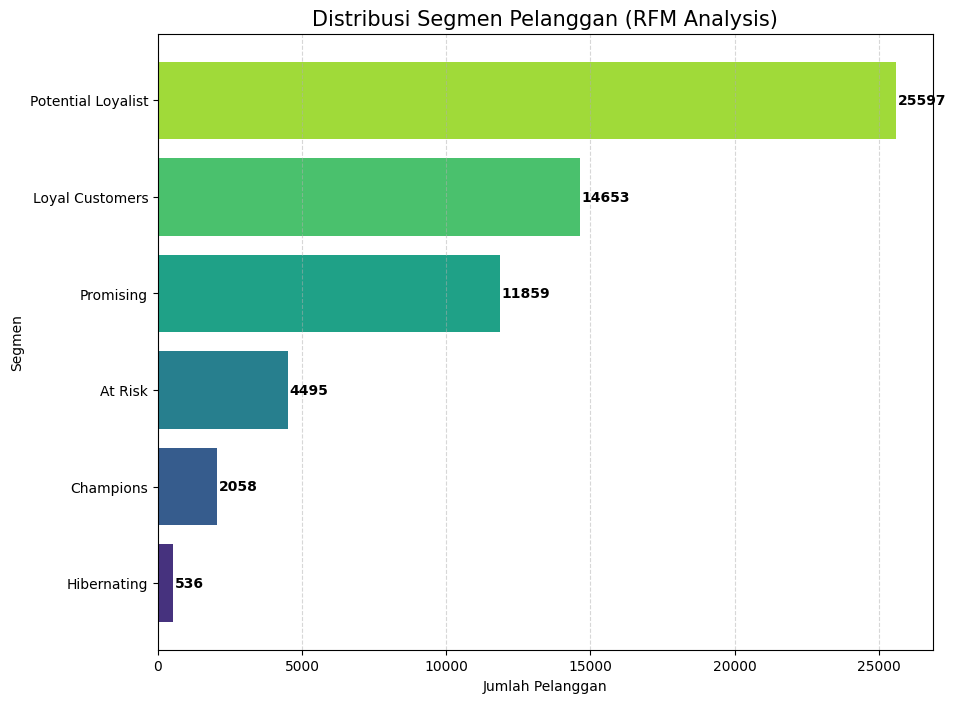

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah customer per segmen
segment_counts = rfm['Customer_Segment'].value_counts().sort_values(ascending=True)

# Buat Bar Chart Horizontal
plt.figure(figsize=(10, 8))
colors = ['#e74c3c', '#f39c12', '#f1c40f', '#2ecc71', '#3498db', '#9b59b6', '#34495e'] # Warna-warni
bars = plt.barh(segment_counts.index, segment_counts.values, color=sns.color_palette('viridis', len(segment_counts)))

# Tambahkan angka di ujung bar
for bar in bars:
    plt.text(bar.get_width() + 50, # Posisi X (sedikit di kanan bar)
             bar.get_y() + bar.get_height()/2, # Posisi Y (tengah bar)
             f'{int(bar.get_width())}', # Angka
             va='center', fontweight='bold')

plt.title('Distribusi Segmen Pelanggan (RFM Analysis)', fontsize=15)
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Segmen')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

#5.2 Scatter Plot

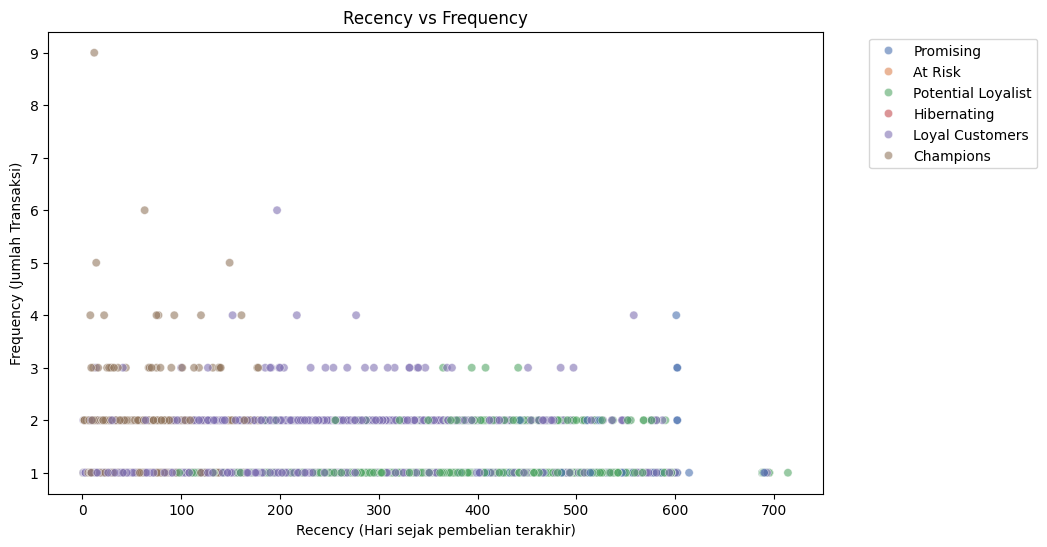

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='recency', y='frequency', hue='Customer_Segment', palette='deep', alpha=0.6)

plt.title('Recency vs Frequency')
plt.xlabel('Recency (Hari sejak pembelian terakhir)')
plt.ylabel('Frequency (Jumlah Transaksi)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Legenda di luar grafik
plt.show()

#Export Hasil Data to csv

In [21]:
rfm.to_csv('rfm_analysis_result.csv', index=False)